In [1]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('white')

In [3]:
def pivot(data, index):
    pivoted_data = data.set_index(index, drop=True) 
    pivoted_data = pivoted_data.unstack().reset_index()
    return pivoted_data

def format_pivoted_data(data, index):
    formatted_data = data[[index, 'level_0', 0]] # re-order columns
    column_names = {'level_0': 'x', 0:'y'}
    formatted_data.rename(columns=column_names, inplace=True) # re-name columns
    return formatted_data

def get_pattern(trend_id):
    return trend_id[2]

def get_sample_trends(data, n_trends=10):
    patterns = sell_data['trend_id'].apply(get_pattern)
    sample_trends = [
        sell_data.loc[patterns == pattern].sample(10)
        for pattern in range(0, 4)
    ]

    sample_trends = pd.concat(sample_trends)
    sample_trends.reset_index(drop=True, inplace=True)
    return sample_trends

def transform_sample_trends(sample_trends, index):
    sample_trends = pivot(sample_trends, index)
    sample_trends = format_pivoted_data(sample_trends, index)
    sample_trends['pattern'] = sample_trends[index].apply(get_pattern)
    return sample_trends

In [4]:
data = pd.read_csv('data/generated_data.csv')

In [5]:
buy_data = data.iloc[:, 0:2]
sell_data = data.drop(columns=['base_price'])

In [6]:
buy_data['trend_id'] = buy_data['trend_id'].apply(ast.literal_eval)
sell_data['trend_id'] = sell_data['trend_id'].apply(ast.literal_eval)

In [7]:
pivoted_sell_data = pivot(sell_data, 'trend_id')
pivoted_sell_data = format_pivoted_data(pivoted_sell_data, 'trend_id')

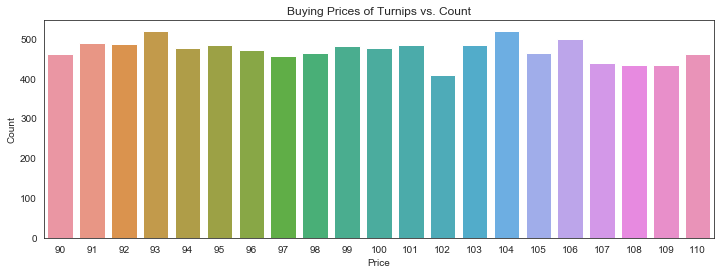

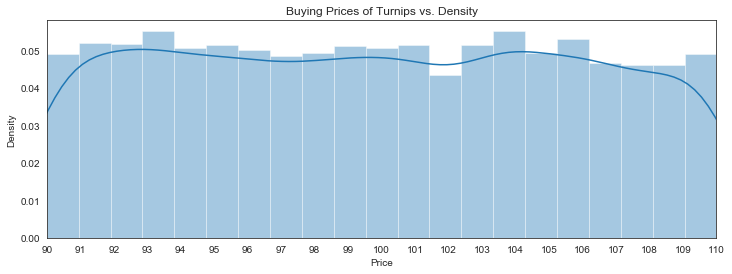

count    9876.000000
mean       99.868672
std         6.035143
min        90.000000
25%        95.000000
50%       100.000000
75%       105.000000
max       110.000000
Name: base_price, dtype: float64

In [8]:
buying_prices = buy_data['base_price']

plt.figure(figsize=(12, 4))
buying_price_countplot = sns.countplot(buying_prices)
buying_price_countplot.set(
    title='Buying Prices of Turnips vs. Count',
    xlabel='Price',
    ylabel='Count'
)
plt.show()

plt.figure(figsize=(12, 4))
buying_price_distplot = sns.distplot(buying_prices, bins=21)
buying_price_distplot.set(
    title='Buying Prices of Turnips vs. Density',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim((90, 110))
plt.xticks(range(90, 111))
plt.show()

buying_prices.describe()

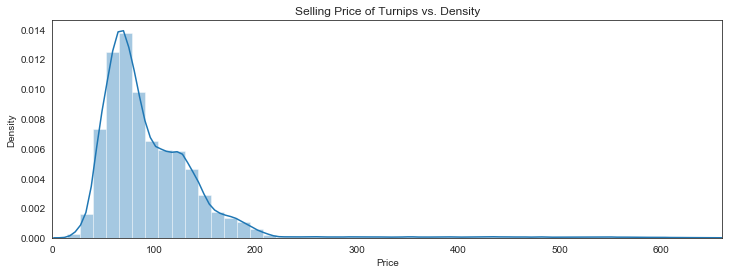

count    118512.000000
mean         97.650871
std          60.678035
min          14.000000
25%          63.000000
50%          82.000000
75%         119.000000
max         660.000000
Name: y, dtype: float64

In [9]:
selling_prices = pivoted_sell_data['y']

plt.figure(figsize=(12, 4))
selling_price_distplot = sns.distplot(selling_prices)
selling_price_distplot.set(
    title='Selling Price of Turnips vs. Density',
    xlabel='Price',
    ylabel='Density'
)
plt.xlim((0, 660))
plt.show()

selling_prices.describe()

In [10]:
sample_trends = get_sample_trends(sell_data, 'trend_id')
sample_trends = transform_sample_trends(sample_trends, 'trend_id')

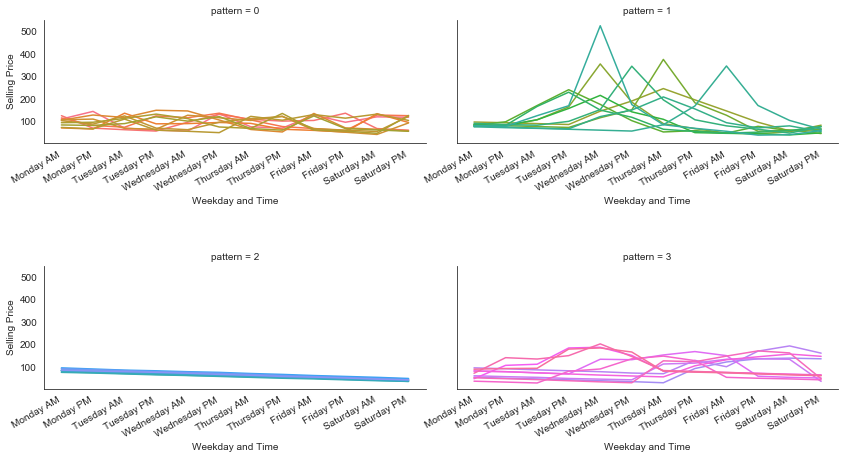

In [11]:
grid = sns.FacetGrid(sample_trends, col='pattern', col_wrap=2, aspect=2, sharex=False, hue='trend_id')
grid = grid.map(sns.lineplot, 'x', 'y', sort=False)
grid.set(xlabel='Weekday and Time', ylabel='Selling Price')

for ax in grid.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=30, ha='right') # set new labels
    
plt.subplots_adjust(hspace=1)
plt.show()